In [17]:
from langgraph.graph import START,END,StateGraph
from typing import TypedDict

In [18]:
class BatsmanState(TypedDict):
    runs:int
    balls:int
    fours:int
    sixes:int

    strikerate:float
    balls_per_boundary:float
    boundary_percentage:float

    summary:str

In [19]:
def calculate_sr(state:BatsmanState)->BatsmanState:
    sr=(state['runs']/state['balls'])*100
    return {"strikerate":sr}
def calculate_bpb(state:BatsmanState)->BatsmanState:
    bpb=(state['balls']/(state['fours']+state['sixes']))
    return {'balls_per_boundary':bpb}
def calculate_bp(state:BatsmanState)->BatsmanState:
    bp=((state['fours']+state['sixes'])/state['balls'])*100
    return {"boundary_percentage":bp}
def make_summary(state:BatsmanState)->BatsmanState:
    state['summary']=f"""
Strike Rate: {state['strikerate']}%
Balls per Boundary: {state['balls_per_boundary']} balls
Boundary Percentage: {state['boundary_percentage']}%
"""
    return state

In [20]:
graph=StateGraph(BatsmanState)
graph.add_node("calculate_sr",calculate_sr)
graph.add_node("calculate_bpb",calculate_bpb)
graph.add_node("calculate_bp",calculate_bp)
graph.add_node("make_summary",make_summary)

In [21]:
graph.add_edge(START,'calculate_sr')
graph.add_edge(START,'calculate_bpb')
graph.add_edge(START,'calculate_bp')
graph.add_edge('calculate_sr',"make_summary")
graph.add_edge('calculate_bpb',"make_summary")
graph.add_edge('calculate_bp',"make_summary")
graph.add_edge("make_summary",END)
workflow=graph.compile()

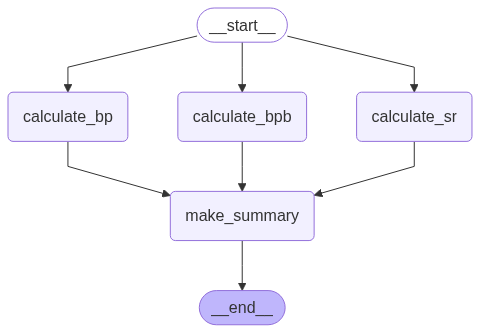

In [22]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [23]:
initial_state={
    "runs":100,
    "balls":50,
    "fours":6,
    "sixes":4
}
final_state=workflow.invoke(initial_state)
print(final_state)

{'runs': 100, 'balls': 50, 'fours': 6, 'sixes': 4, 'strikerate': 200.0, 'balls_per_boundary': 5.0, 'boundary_percentage': 20.0, 'summary': '\nStrike Rate: 200.0%\nBalls per Boundary: 5.0 balls\nBoundary Percentage: 20.0%\n'}


In [24]:
print(final_state['summary'])


Strike Rate: 200.0%
Balls per Boundary: 5.0 balls
Boundary Percentage: 20.0%

